In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import entropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [199]:
# Load the dataset
dataset = pd.read_csv('/kaggle/input/dos-attack-http-dataset/DoS_Attack_HTTP_Dataset.csv')

In [200]:
#Create a copy of the dataset
df = dataset.copy()

In [201]:
# Display the first few rows of the copied dataset
print("First few rows of the copied dataset:")
df.head()

First few rows of the copied dataset:


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Anomaly,DoS,DoS_HTTP


In [202]:
# Display the dimensions of the copied dataset
print("\nDimensions of the copied dataset:")
df.shape


Dimensions of the copied dataset:


(52466, 86)

In [203]:
# Display basic statistics for numerical columns in the copied dataset
print("\nSummary statistics for numerical columns in the copied dataset:")
df.describe()


Summary statistics for numerical columns in the copied dataset:


/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,52466.000000,52466.000000,52466.000000,5.246600e+04,52466.000000,52466.000000,5.246600e+04,5.246600e+04,52466.000000,52466.000000,...,52466.000000,52466.0,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04,5.246600e+04
mean,47050.529200,1501.611691,6.022071,2.151672e+07,26.762074,12.085103,1.884416e+04,8.628475e+03,245.663515,3.324038,...,25.153757,0.0,6.333993e+04,1.835744e+04,8.336379e+04,5.044620e+04,1.626185e+07,3.460345e+04,1.629925e+07,1.623582e+07
std,11848.992772,8462.286010,0.502020,2.147455e+07,441.616419,286.512092,3.796717e+05,2.639271e+05,240.916769,53.548732,...,441.703860,0.0,8.472763e+05,3.557754e+05,1.049507e+06,7.944014e+05,2.150785e+07,5.042377e+05,2.151519e+07,2.151443e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,38974.000000,80.000000,6.000000,7.260614e+06,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,51386.000000,80.000000,6.000000,1.382454e+07,3.000000,4.000000,3.295000e+02,4.940000e+02,327.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.967406e+06,0.000000e+00,6.967411e+06,6.966082e+06
75%,55058.000000,80.000000,6.000000,3.206856e+07,3.000000,5.000000,4.420000e+02,4.940000e+02,436.000000,0.000000,...,1.000000,0.0,8.500000e+01,0.000000e+00,8.600000e+01,8.500000e+01,2.022986e+07,0.000000e+00,2.024176e+07,2.022985e+07
max,64018.000000,60938.000000,17.000000,1.200000e+08,9599.000000,9599.000000,9.152846e+06,9.151233e+06,1472.000000,1138.000000,...,9599.000000,0.0,1.000445e+08,1.182355e+07,1.000445e+08,1.000445e+08,1.193674e+08,2.060854e+07,1.193674e+08,1.193674e+08


In [204]:
print('\nInformation about the dataset')
df.info()


Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52466 entries, 0 to 52465
Data columns (total 86 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flow_ID            52466 non-null  object 
 1   Src_IP             52466 non-null  object 
 2   Src_Port           52466 non-null  int64  
 3   Dst_IP             52466 non-null  object 
 4   Dst_Port           52466 non-null  int64  
 5   Protocol           52466 non-null  int64  
 6   Timestamp          52466 non-null  object 
 7   Flow_Duration      52466 non-null  int64  
 8   Tot_Fwd_Pkts       52466 non-null  int64  
 9   Tot_Bwd_Pkts       52466 non-null  int64  
 10  TotLen_Fwd_Pkts    52466 non-null  float64
 11  TotLen_Bwd_Pkts    52466 non-null  float64
 12  Fwd_Pkt_Len_Max    52466 non-null  float64
 13  Fwd_Pkt_Len_Min    52466 non-null  float64
 14  Fwd_Pkt_Len_Mean   52466 non-null  float64
 15  Fwd_Pkt_Len_Std    52466 non-null  floa

In [205]:
print('\n Checking for null values.....')
null_values = df.isnull().sum()


 Checking for null values.....


In [206]:
print('Display columns with null values')
null_columns = null_values[null_values > 0]
if not null_columns.empty:
    print('Columns with null values:')
    print(null_columns)
else:
    print('No null values found in the dataset.')

Display columns with null values
Columns with null values:
Flow_Byts/s    3
dtype: int64


In [207]:
#Impute null values with the mean of the column
mean_flow_bytes_per_second = df['Flow_Byts/s'].mean()
df['Flow_Byts/s'].fillna(mean_flow_bytes_per_second)

0           160.479704
1           176.651118
2           160.887540
3           180.683820
4           178.493796
             ...      
52461     31529.640358
52462    148918.965671
52463     70567.586355
52464      6535.064331
52465       293.856615
Name: Flow_Byts/s, Length: 52466, dtype: float64

In [208]:
# Check for null values in the "Flow_Byts/s" column
null_values_flow_bytes_per_second = df['Flow_Byts/s'].isnull().sum()
print("Null values in 'Flow_Byts/s' column after replacement:", null_values_flow_bytes_per_second)


Null values in 'Flow_Byts/s' column after replacement: 3


## Univariate Analysis


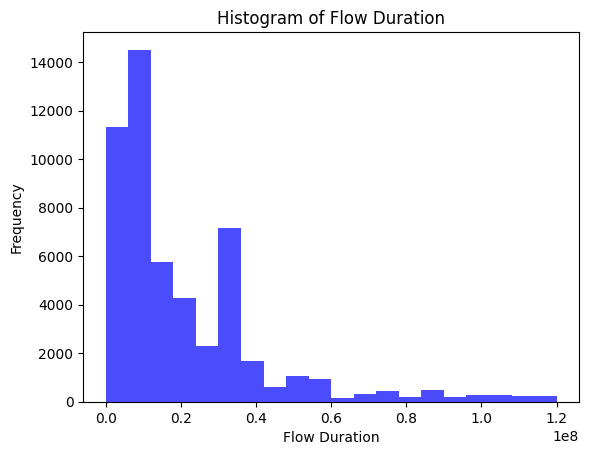

In [209]:
import matplotlib.pyplot as plt

# Histogram of a numerical feature
plt.hist(df['Flow_Duration'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

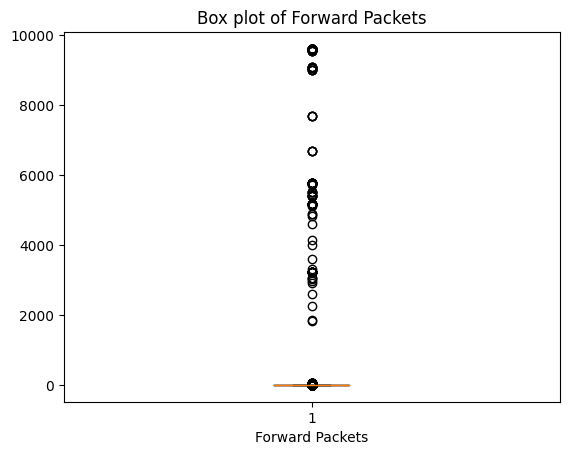

In [210]:
# Box plot of a numerical feature
plt.boxplot(df['Tot_Fwd_Pkts'])
plt.xlabel('Forward Packets')
plt.title('Box plot of Forward Packets')
plt.show()


In [211]:
# Summary statistics of a numerical feature
print("Summary statistics of Flow Duration:")
print(df['Flow_Duration'].describe())

Summary statistics of Flow Duration:
count    5.246600e+04
mean     2.151672e+07
std      2.147455e+07
min      0.000000e+00
25%      7.260614e+06
50%      1.382454e+07
75%      3.206856e+07
max      1.200000e+08
Name: Flow_Duration, dtype: float64


## Bivariate Analysis

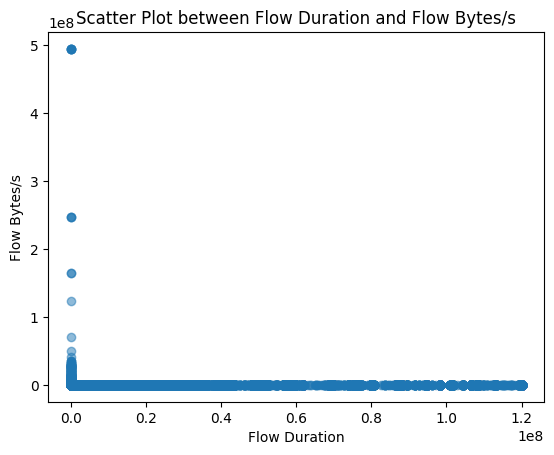

In [212]:
# Scatter plot between two numerical features
plt.scatter(df['Flow_Duration'], df['Flow_Byts/s'], alpha=0.5)
plt.xlabel('Flow Duration')
plt.ylabel('Flow Bytes/s')
plt.title('Scatter Plot between Flow Duration and Flow Bytes/s')
plt.show()

             PC1        PC2    Label
0       0.648542  -0.562166  Anomaly
1       0.950666  -0.589320  Anomaly
2       0.655871  -0.562791  Anomaly
3       1.026433  -0.596544  Anomaly
4       0.984640  -0.592548  Anomaly
...          ...        ...      ...
52461  15.426541  20.841401   Normal
52462  36.062478  67.262054   Normal
52463  24.540249  40.556156   Normal
52464   6.199624  14.669763   Normal
52465   8.863336   1.569796   Normal

[52466 rows x 3 columns]


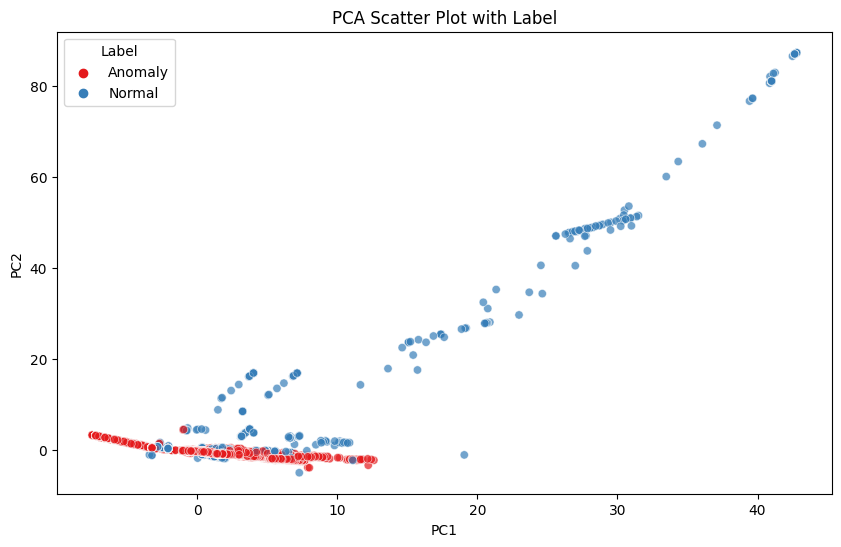

In [213]:
from sklearn.preprocessing import StandardScaler

# Replace infinity values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only numerical columns for standardization
numerical_columns = df.select_dtypes(include=['number'])

# Impute NaN values with the mean of each column
numerical_columns_filled = numerical_columns.fillna(numerical_columns.mean())

# Standardize the numerical data
scaler = StandardScaler()
numerical_columns_scaled = scaler.fit_transform(numerical_columns_filled)

# Perform PCA on the scaled data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numerical_columns_scaled)

# Create DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate PCA results with labels
pca_df['Label'] = df['Label']
print(pca_df)

# Plot PCA results with labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='Set1', alpha=0.7)
plt.title('PCA Scatter Plot with Label')
plt.show()


In [214]:
pca_df.head(10)

,PC1,PC2,Label
0,0.648542,-0.562166,Anomaly
1,0.950666,-0.589320,Anomaly
2,0.655871,-0.562791,Anomaly
3,1.026433,-0.596544,Anomaly
4,0.984640,-0.592548,Anomaly
5,1.967107,-0.712593,Anomaly
6,1.500317,-0.648882,Anomaly
7,0.935624,-0.588026,Anomaly
8,0.498979,-0.549912,Anomaly
9,1.202719,-0.614011,Anomaly


## Feature selection

In [215]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['Label', 'Cat', 'Sub_Cat']:
    df[col + '_Encoded'] = label_encoder.fit_transform(df[col])

# Flip the labels
for col in ['Label_Encoded', 'Cat_Encoded', 'Sub_Cat_Encoded']:
    df[col] = 1 - df[col]

# Drop original categorical columns after encoding
df.drop(['Label', 'Cat', 'Sub_Cat'], axis=1, inplace=True)


In [216]:
from sklearn.preprocessing import LabelEncoder

# Exclude non-numeric columns from the correlation calculation
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
correlation_with_label = df[numeric_columns].corrwith(df['Label_Encoded']).drop('Label_Encoded') 

# Sort the correlations in descending order
correlation_with_label_sorted = correlation_with_label.abs().sort_values(ascending=False)

# Display the sorted correlation values
correlation_with_label_sorted.head(20)

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Sub_Cat_Encoded      1.000000
Cat_Encoded          1.000000
Dst_Port             0.918033
Src_Port             0.706063
PSH_Flag_Cnt         0.673029
Bwd_PSH_Flags        0.673029
FIN_Flag_Cnt         0.521628
Pkt_Size_Avg         0.433530
Pkt_Len_Mean         0.386511
Flow_IAT_Std         0.365963
Bwd_Pkt_Len_Min      0.342513
Fwd_Pkt_Len_Min      0.339221
Fwd_Act_Data_Pkts    0.302957
Tot_Fwd_Pkts         0.302577
Subflow_Fwd_Pkts     0.302577
Bwd_Seg_Size_Avg     0.293537
Bwd_Pkt_Len_Mean     0.293537
Pkt_Len_Min          0.287725
Fwd_Header_Len       0.282427
Subflow_Fwd_Byts     0.267041
dtype: float64

In [217]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Encoded,Cat_Encoded,Sub_Cat_Encoded
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1


In [218]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp']


In [219]:
# for column in categorical_columns:
#     unique_categories = df[column].unique()
#     print(f"Unique categories in {column}: {unique_categories}")


In [220]:
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Calculate mutual information for numerical features after imputation
mutual_info_numerical = mutual_info_classif(X_numerical_imputed, df['Label_Encoded'], discrete_features='auto')

# Create a DataFrame to display the results
mutual_info_numerical_df = pd.DataFrame(mutual_info_numerical, index=X_numerical.columns, columns=['Mutual Information'])
mutual_info_numerical_df.sort_values(by='Mutual Information', ascending=False, inplace=True)
mutual_info_numerical_df.head(10)


,Mutual Information
Cat_Encoded,0.155127
Sub_Cat_Encoded,0.153716
Src_Port,0.140020
Dst_Port,0.127966
Flow_Pkts/s,0.123139
Bwd_Pkts/s,0.122874
Fwd_Pkts/s,0.121697
Flow_IAT_Mean,0.119751
Bwd_Header_Len,0.117194
Flow_IAT_Std,0.113635


## Feature Engineering

In [221]:
# Create new feature: Packet rate (packets per second)
df['Packet_Rate'] = df['Tot_Fwd_Pkts'] / df['Flow_Duration']

# Create new feature: Packet size distribution (ratio of forward packets to total packets)
df['Packet_Size_Distribution'] = df['Tot_Fwd_Pkts'] / (df['Tot_Fwd_Pkts'] + df['Tot_Bwd_Pkts'])

# Create new feature: Frequency of specific protocol types
# Assuming Protocol column contains protocol types
protocol_counts = df['Protocol'].value_counts(normalize=True)  # Get relative frequency of each protocol
df['Protocol_Frequency'] = df['Protocol'].map(protocol_counts)

# Display the updated DataFrame with new features
df.head()


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label_Encoded,Cat_Encoded,Sub_Cat_Encoded,Packet_Rate,Packet_Size_Distribution,Protocol_Frequency
0,192.168.100.150-192.168.100.3-51370-80-6,192.168.100.150,51370,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003748,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.995506e-07,0.375,0.997846
1,192.168.100.150-192.168.100.3-51368-80-6,192.168.100.150,51368,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5004214,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.994947e-07,0.375,0.997846
2,192.168.100.150-192.168.100.3-51372-80-6,192.168.100.150,51372,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003495,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.995809e-07,0.375,0.997846
3,192.168.100.150-192.168.100.3-51374-80-6,192.168.100.150,51374,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5003215,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.996144e-07,0.375,0.997846
4,192.168.100.150-192.168.100.3-51376-80-6,192.168.100.150,51376,192.168.100.3,80,6,04/06/2018 01:02:02 AM,5002975,3,5,...,0.0,0.0,0.0,0.0,1,1,1,5.996432e-07,0.375,0.997846


In [222]:
from sklearn.impute import SimpleImputer

# Impute missing values in numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
X_numerical_imputed = imputer.fit_transform(X_numerical)

# Calculate mutual information for numerical features after imputation
mutual_info_numerical = mutual_info_classif(X_numerical_imputed, df['Label_Encoded'], discrete_features='auto')

# Create a DataFrame to display the results
mutual_info_numerical_df = pd.DataFrame(mutual_info_numerical, index=X_numerical.columns, columns=['Mutual Information'])
mutual_info_numerical_df.sort_values(by='Mutual Information', ascending=False, inplace=True)
mutual_info_numerical_df.head(20)


,Mutual Information
Sub_Cat_Encoded,0.154698
Cat_Encoded,0.154088
Src_Port,0.140056
Dst_Port,0.128017
Flow_Pkts/s,0.123177
Bwd_Pkts/s,0.122813
Fwd_Pkts/s,0.121931
Flow_IAT_Mean,0.119809
Bwd_Header_Len,0.116659
Flow_IAT_Std,0.113324


In [223]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select only numerical features for scaling
numerical_features = df_selected_features.select_dtypes(include=['float64', 'int64'])

# Standardize numerical features since we are using bi-lstm
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)
df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Normalize numerical features
# scaler = MinMaxScaler()
# scaled_features = scaler.fit_transform(numerical_features)
# df_scaled = pd.DataFrame(scaled_features, columns=numerical_features.columns)

# Concatenate scaled numerical features with categorical features
df_scaled = pd.concat([df_scaled, df[['Cat_Encoded', 'Sub_Cat_Encoded']]], axis=1)

# Display the scaled dataset
print("Scaled Dataset:")
df_scaled.head()


Scaled Dataset:


,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat_Encoded,Sub_Cat_Encoded
0,-0.768963,-0.053808,-0.024729,-0.048819,-0.030821,0.262900,-0.062076,0.166558,0.314315,0.231888,...,-0.074758,-0.051599,-0.079432,-0.063503,-0.756096,-0.068626,-0.757577,-0.754655,1,1
1,-0.768941,-0.053808,-0.024729,-0.048606,-0.030821,0.599119,-0.062076,0.429816,0.669328,0.231888,...,-0.074758,-0.051599,-0.079432,-0.063503,-0.756096,-0.068626,-0.757577,-0.754655,1,1
2,-0.768974,-0.053808,-0.024729,-0.048814,-0.030821,0.271202,-0.062076,0.173058,0.323081,0.231888,...,-0.074758,-0.051599,-0.079432,-0.063503,-0.756096,-0.068626,-0.757577,-0.754655,1,1
3,-0.768987,-0.053808,-0.024729,-0.048553,-0.030821,0.682136,-0.062076,0.494818,0.756985,0.231888,...,-0.074758,-0.051599,-0.079432,-0.063503,-0.756096,-0.068626,-0.757577,-0.754655,1,1
4,-0.768999,-0.053808,-0.024729,-0.048582,-0.030821,0.636477,-0.062076,0.459067,0.708774,0.231888,...,-0.074758,-0.051599,-0.079432,-0.063503,-0.756096,-0.068626,-0.757577,-0.754655,1,1


In [228]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold

# Define your Bi-LSTM model using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Define your features (X) and target variable (y)
X = df.drop(columns=['Label_Encoded'])  # Exclude the target variable column
y = df['Label_Encoded'].values  # Target variable


# Define the cross-validation strategy (e.g., Stratified K-Fold with 5 folds)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = []
for train_index, test_index in cv_strategy.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Reshape input data to match expected input shape
    X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
    X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
    
    # Train the model
    model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Evaluate the model
    _, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
    cv_scores.append(accuracy)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))


KeyError: "None of [Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,\n       ...\n       52456, 52457, 52458, 52459, 52460, 52461, 52462, 52463, 52464, 52465],\n      dtype='int64', length=41972)] are in the [columns]"